# 변수 중요도

**실습 목표**

* 변수중요도를 파악한다.
    * Decision Tree와 Random Forest, XGBoost 모델에서 변수중요도를 파악할 수 있다.
---------------------------

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as rd

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## 1.변수 중요도

### 1.1 데이터 준비


In [2]:
# 데이터 불러오기

iris = pd.read_csv("https://raw.githubusercontent.com/DA4BAM/dataset/master/iris.csv")

from sklearn.model_selection import train_test_split

# features와 target 분리
target = 'Species'
x = iris.drop(target, axis = 1)
y = iris.loc[:, target]  # target 변수.

# 먼저 전체에서 train : test = 8 : 2
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=1)


### 1.2 Decision Tree에서 변수 중요도 확인하기


In [3]:
# 필요한 알고리즘 불러오기
from sklearn.tree import DecisionTreeClassifier

# 모델 선언
dt = DecisionTreeClassifier()

# 학습을 시킨 후(모델을 생성한 후)에 변수 중요도를 살펴볼 수 있다.
dt.fit(train_x, train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [4]:
dt.feature_importances_

array([0.        , 0.03133487, 0.07584566, 0.89281948])

In [5]:
# 변수 중요도를 살펴보자.
#칼럼 이름순으로 중요도 값이 보여진다.
print(train_x.columns.values)
print(dt.feature_importances_)

['Sepal.Length' 'Sepal.Width' 'Petal.Length' 'Petal.Width']
[0.         0.03133487 0.07584566 0.89281948]


In [6]:
# 변수 중요도를 시각화 해보자.
# 변수이름과 중요도를 dictionary로 만들자.
fi = {}
for i in range(len(train_x.columns)) :
    fi[train_x.columns[i]] = dt.feature_importances_[i]

print(fi)

{'Sepal.Length': 0.0, 'Sepal.Width': 0.031334865260079385, 'Petal.Length': 0.07584565922951902, 'Petal.Width': 0.8928194755104016}


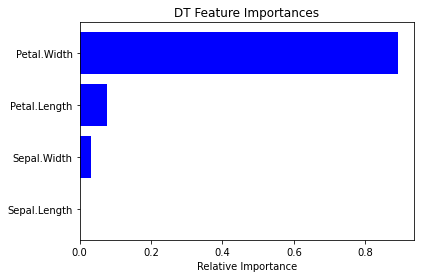

In [7]:
# bar chart로 시각화
importances = dt.feature_importances_
indices = np.argsort(importances)

plt.title('DT Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [train_x.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### 1.3 Random Forest로 변수 중요도 확인

In [8]:
# 사용할 것 불러오고!
from sklearn.ensemble import RandomForestClassifier

# 사용할 모델 선언하고!
rfc = RandomForestClassifier()

# 학습을 시킨다!
rfc.fit(train_x, train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [11]:
# 변수 중요도 확인
rfc.feature_importances_

array([0.113048  , 0.03867552, 0.41435075, 0.43392573])

In [12]:
#변수 중요도를 시각화 해보자.
# 먼저 변수이름과 중요도를 dictionary로 만들고
fi = {}
for i in range(len(train_x.columns)) :
    fi[train_x.columns[i]] = rfc.feature_importances_[i]

print(fi)

{'Sepal.Length': 0.11304800035867545, 'Sepal.Width': 0.03867552222205387, 'Petal.Length': 0.41435074703089375, 'Petal.Width': 0.43392573038837684}


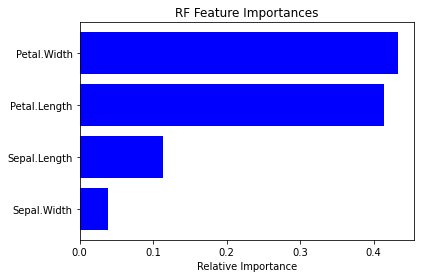

In [13]:
importances = rfc.feature_importances_
indices = np.argsort(importances)

plt.title('RF Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [train_x.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### 1.4 XGBoost로 변수 중요도 확인

In [14]:
# 사용할 것 불러오고
import xgboost as xgb

In [15]:
# 1) 모델 선언
xgb_model = xgb.XGBClassifier()

# 2) 학습
xgb_model.fit(train_x, train_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [16]:
# 변수 중요도 확인
xgb_model.feature_importances_

array([0.01901784, 0.02249648, 0.5156201 , 0.44286555], dtype=float32)

In [17]:
#변수 중요도를 시각화 해보자.
# 먼저 변수이름과 중요도를 dictionary로 만들고
fi = {}
for i in range(len(train_x.columns)) :
    fi[train_x.columns[i]] = xgb_model.feature_importances_[i]

print(fi)

{'Sepal.Length': 0.019017842, 'Sepal.Width': 0.02249648, 'Petal.Length': 0.5156201, 'Petal.Width': 0.44286555}


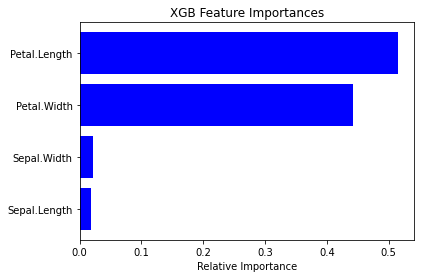

In [18]:
importances = xgb_model.feature_importances_
indices = np.argsort(importances)

plt.title('XGB Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [train_x.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

decision tree와 random forest, XGBoost에서 제시해주는 변수 중요도가 다를 수 있다.  
그럼 우리는 무엇을 선택해야 할 것인가?


### 1.5 실습 : 변수 중요도 확인

* mobile 데이터를 이용합니다.
* Dicision Tree, Random Forest, XGBoost 모델을 만들고 변수 중요도를 확인합니다. 
* bar plot으로 변수 중요도를 시각화 합니다.

#### 변수 중요도를 알게되면 우리는 무엇을 할 수 있나요?

#### 1) 데이터준비

In [ ]:
# 데이터를 불러옵시다.
mobile = pd.read_csv("https://raw.githubusercontent.com/DA4BAM/dataset/master/mobile_cust_churn.csv")


In [ ]:
# 불필요한 변수들 제거 : 가변수화 하기 전 변수, id, 일련번호 등.
fields_to_drop = ['id','REPORTED_SATISFACTION', 'REPORTED_USAGE_LEVEL','CONSIDERING_CHANGE_OF_PLAN']
data = mobile.drop(fields_to_drop, axis=1)
data.head()

In [ ]:
# 데이터 셋 분리하기
from sklearn.model_selection import train_test_split 

# features와 target 분리
target = 'CHURN'
x = data.drop(target, axis=1)
y = data.loc[:, target]

# 먼저 전체에서 train : test = 6 : 4
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.4, random_state=1)


#### 2) Decision Tree에서 변수 중요도 확인하기
* 필요한 함수 불러오고
* 모델 선언
* 학습
* 변수 중요도 확인


#### 3) Random Forest로 변수 중요도 확인
* 필요한 함수 불러오고
* 모델 선언
* 학습
* 변수 중요도 확인

#### 4) xgboost로 변수 중요도 확인
* 필요한 함수 불러오고
* 모델 선언
* 학습
* 변수 중요도 확인